## Punto 5 Parte b y c

Para esta parte se implementó el método de diferencias finitas. Como se indicó en clase, se utilizará un $\delta_{i,j}$ menor a 0.1

El resultado se puede evidenciar a continuación.

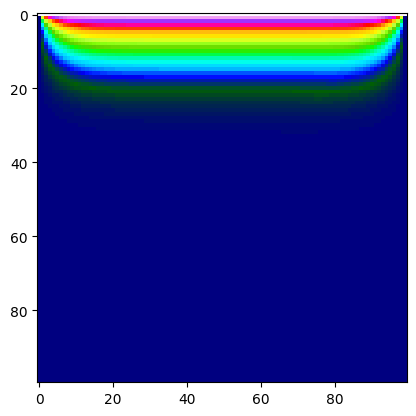

In [48]:
import numpy as np 
import matplotlib.pyplot as plt


def calcularNuevo(M): 
    n = len(M[0])

    for x in range(1, (n//2) +1):
        for i in range(x, n-x):
            M[x][i] = (M[x][i-1] + M[x][i+1] + M[x-1][i] + M[x+1][i])/4
            M[i][x] = (M[i-1][x] + M[i+1][x] + M[i][x-1] + M[i][x+1])/4
            M[n-x-1][i] = (M[n-x-1][i-1] + M[n-x-1][i+1] + M[n-x][i] + M[n-x-2][i])/4
            M[i][n-x-1] = (M[i-1][n-x-1] + M[i+1][n-x-1] + M[i][n-x] + M[i][n-x-2])/4

    return M





def encontrarDelta(cambio,original,sensitivity): 


    cambio =  calcularNuevo(cambio)

    #print(newCalculated)
    delta =0
    for i in range(0, len(cambio[0])): 
        for j in range (0,len(cambio[0])): 
            if original[i][j]!=0: 
                #print(delta, cambio[i][j], original[i][j], cambio[i][j]- original[i][j])
                delta += np.abs(cambio[i][j]-original[i][j])/original[i][j]

    delta/=(len(cambio[0])**2)


    if delta<=sensitivity and delta!=0: 
        plt.imshow(cambio, cmap='gist_ncar',interpolation='nearest')
        plt.show()

        return cambio
    else: 
        original = cambio.copy()
        encontrarDelta(cambio,original,sensitivity)



original = np.zeros ((100,100))

cambio = np.zeros((100,100)) 

original [0] = 5 * np.ones((100))

cambio[0] = 5*np.ones((100)) 



potential = encontrarDelta(cambio,original,0.1)







#### Evidentemente, el resultado es el esperado... entre más alejado se encuentra el cuadro de la grilla de la pared con potenvial V=5, menor será el potencial evidenciado en este punto. Para un resultado de más alta precisión, se usará un $\delta_{i,j}$ menor a 0.05

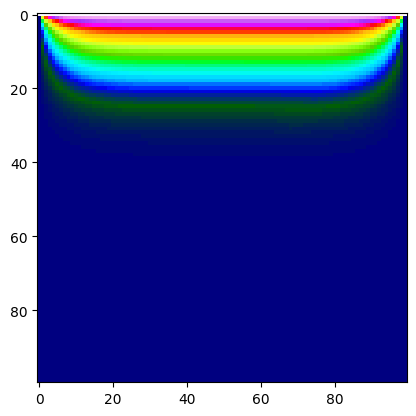

In [50]:
original = np.zeros ((100,100))

cambio = np.zeros((100,100)) 

original [0] = 5 * np.ones((100))

cambio[0] = 5*np.ones((100)) 



potential = encontrarDelta(cambio,original,0.05)
